___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
df=pd.read_csv("./Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.drop(columns=["RowNumber","CustomerId","Surname"],inplace=True)

In [5]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [6]:
df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

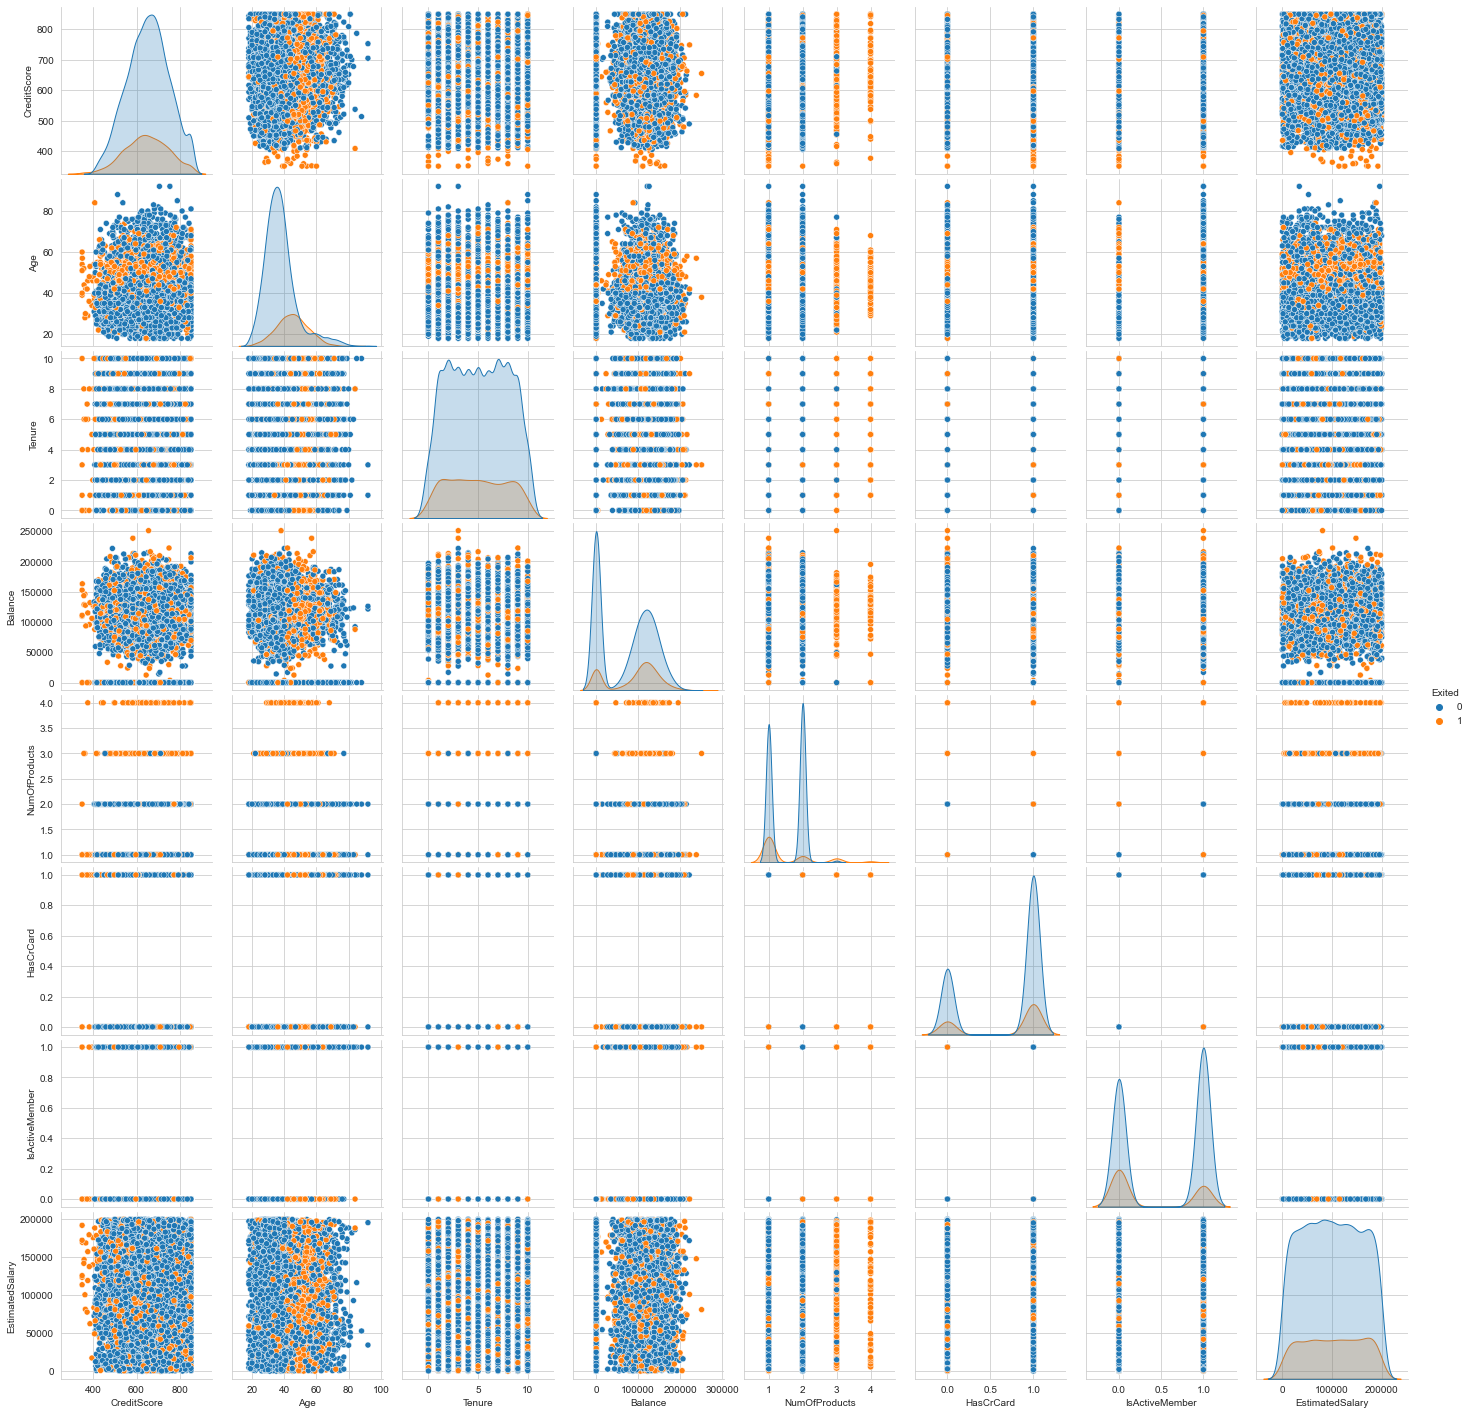

In [7]:
sns.pairplot(df,hue="Exited")

In [8]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000
mean,650.529,38.922,5.013,76485.889,1.530,0.706,0.515,100090.240,0.204
std,96.653,10.488,2.892,62397.405,0.582,0.456,0.500,57510.493,0.403
min,350.000,18.000,0.000,0.000,1.000,0.000,0.000,11.580,0.000
25%,584.000,32.000,3.000,0.000,1.000,0.000,0.000,51002.110,0.000
50%,652.000,37.000,5.000,97198.540,1.000,1.000,1.000,100193.915,0.000
75%,718.000,44.000,7.000,127644.240,2.000,1.000,1.000,149388.247,0.000
max,850.000,92.000,10.000,250898.090,4.000,1.000,1.000,199992.480,1.000


<AxesSubplot:>

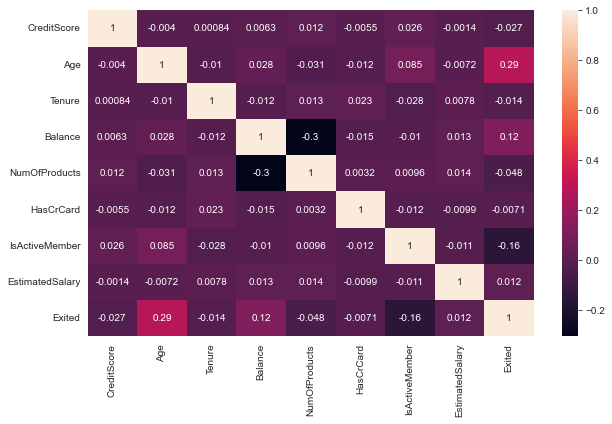

In [9]:
sns.heatmap(df.corr(),annot=True)

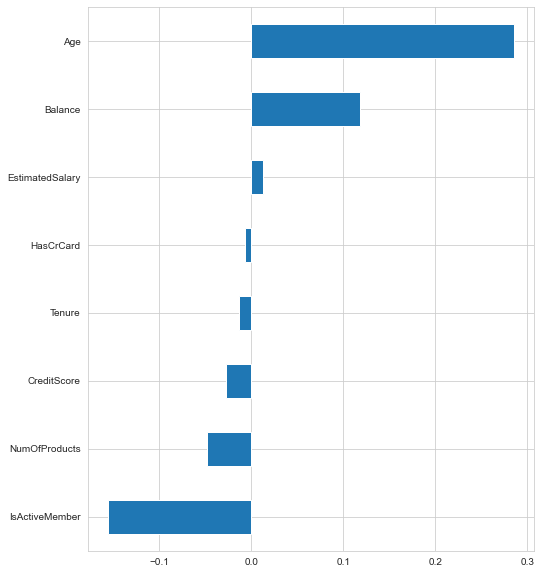

In [10]:
plt.figure(figsize = (8,10))
df.corr()['Exited'].sort_values().drop("Exited").plot(kind = "barh");

In [11]:
df["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

# Preprocessing of Data
- Train | Test Split, Scalling

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.compose import make_column_transformer

In [13]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.3)

In [15]:
cat = X_train.select_dtypes("object").columns.to_list()
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse=False), cat),
    remainder=MinMaxScaler()
)

In [16]:
X_train = column_trans.fit_transform(X_train)
X_test = column_trans.fit_transform(X_test)

In [18]:
X_train

array([[0.        , 1.        , 0.        , ..., 1.        , 1.        ,
        0.81638075],
       [1.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.22481571],
       [0.        , 0.        , 1.        , ..., 1.        , 1.        ,
        0.1021234 ],
       ...,
       [0.        , 0.        , 1.        , ..., 1.        , 1.        ,
        0.33348875],
       [1.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.01865056],
       [1.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.54400794]])

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [99]:
X_train.shape,X_test.shape

((7000, 13), (3000, 13))

In [58]:
model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [59]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 100, epochs = 100, verbose=1)

Epoch 1/100
63/63 [==============================] - 1s 7ms/step - loss: 0.5838 - accuracy: 0.7414 - val_loss: 0.5269 - val_accuracy: 0.7786
Epoch 2/100
63/63 [==============================] - 0s 3ms/step - loss: 0.4860 - accuracy: 0.7983 - val_loss: 0.4965 - val_accuracy: 0.7786
Epoch 3/100
63/63 [==============================] - 0s 3ms/step - loss: 0.4730 - accuracy: 0.7983 - val_loss: 0.4810 - val_accuracy: 0.7786
Epoch 4/100
63/63 [==============================] - 0s 3ms/step - loss: 0.4637 - accuracy: 0.7983 - val_loss: 0.4694 - val_accuracy: 0.7786
Epoch 5/100
63/63 [==============================] - 0s 3ms/step - loss: 0.4532 - accuracy: 0.8059 - val_loss: 0.4608 - val_accuracy: 0.7929
Epoch 6/100
63/63 [==============================] - 0s 3ms/step - loss: 0.4427 - accuracy: 0.8116 - val_loss: 0.4506 - val_accuracy: 0.7900
Epoch 7/100
63/63 [==============================] - 0s 3ms/step - loss: 0.4324 - accuracy: 0.8165 - val_loss: 0.4388 - val_accuracy: 0.7943
Epoch 8/100
6

In [60]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 36)                504       
                                                                 
 dense_9 (Dense)             (None, 18)                666       
                                                                 
 dense_10 (Dense)            (None, 9)                 171       
                                                                 
 dense_11 (Dense)            (None, 1)                 10        
                                                                 
Total params: 1,351
Trainable params: 1,351
Non-trainable params: 0
_________________________________________________________________


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [61]:
loss_df = pd.DataFrame(model.history.history)
loss_df

,loss,accuracy,val_loss,val_accuracy
0,0.584,0.741,0.527,0.779
1,0.486,0.798,0.496,0.779
2,0.473,0.798,0.481,0.779
3,0.464,0.798,0.469,0.779
4,0.453,0.806,0.461,0.793
...,...,...,...,...
95,0.317,0.872,0.358,0.854
96,0.316,0.869,0.364,0.859
97,0.315,0.872,0.357,0.857
98,0.314,0.871,0.359,0.857


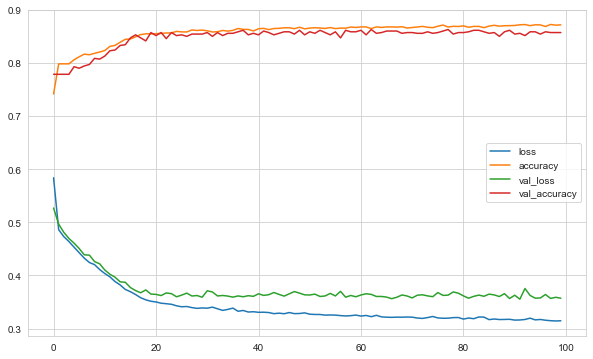

In [62]:
loss_df.plot();

In [63]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.3541821241378784
accuracy :  0.8566666841506958


In [64]:
y_pred = model.predict(X_test) > 0.2
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

94/94 [==============================] - 0s 1ms/step
[[1961  428]
 [ 191  420]]
              precision    recall  f1-score   support

           0       0.91      0.82      0.86      2389
           1       0.50      0.69      0.58       611

    accuracy                           0.79      3000
   macro avg       0.70      0.75      0.72      3000
weighted avg       0.83      0.79      0.81      3000



## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

In [65]:
from sklearn.utils import class_weight

### Create The Model

In [66]:
class_weights = class_weight.compute_class_weight("balanced",
                                                  classes=np.unique(y_train),
                                                  y=y_train)
class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6279153211338356, 1: 2.4544179523141656}

In [67]:
model = Sequential()

model.add(Dense(18, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(12, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [68]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=1000,
          verbose=1,
          class_weight=class_weights)

Epoch 1/1000
50/50 [==============================] - 1s 8ms/step - loss: 0.6868 - accuracy: 0.7883 - val_loss: 0.6586 - val_accuracy: 0.7457
Epoch 2/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.6704 - accuracy: 0.7092 - val_loss: 0.6296 - val_accuracy: 0.6743
Epoch 3/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.6466 - accuracy: 0.6738 - val_loss: 0.6098 - val_accuracy: 0.6571
Epoch 4/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.6289 - accuracy: 0.6786 - val_loss: 0.6031 - val_accuracy: 0.6657
Epoch 5/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.6155 - accuracy: 0.6611 - val_loss: 0.6021 - val_accuracy: 0.6686
Epoch 6/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.6054 - accuracy: 0.6854 - val_loss: 0.6183 - val_accuracy: 0.6757
Epoch 7/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5953 - accuracy: 0.6867 - val_loss: 0.5640 - val_accuracy: 0.7200
Epoch 

In [69]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 18)                252       
                                                                 
 dense_13 (Dense)            (None, 12)                228       
                                                                 
 dense_14 (Dense)            (None, 9)                 117       
                                                                 
 dense_15 (Dense)            (None, 1)                 10        
                                                                 
Total params: 607
Trainable params: 607
Non-trainable params: 0
_________________________________________________________________


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [70]:
loss_df = pd.DataFrame(model.history.history)
loss_df

,loss,accuracy,val_loss,val_accuracy
0,0.687,0.788,0.659,0.746
1,0.670,0.709,0.630,0.674
2,0.647,0.674,0.610,0.657
3,0.629,0.679,0.603,0.666
4,0.616,0.661,0.602,0.669
...,...,...,...,...
995,0.399,0.815,0.479,0.770
996,0.400,0.812,0.476,0.771
997,0.397,0.814,0.438,0.803
998,0.400,0.815,0.479,0.767


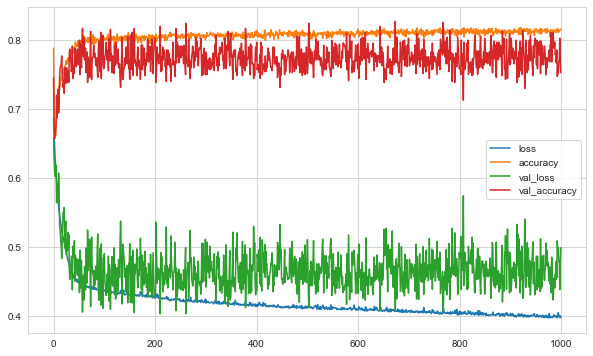

In [71]:
loss_df.plot();

In [72]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.5022420883178711
accuracy :  0.7559999823570251


In [73]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

94/94 [==============================] - 0s 2ms/step
[[1815  574]
 [ 158  453]]
              precision    recall  f1-score   support

           0       0.92      0.76      0.83      2389
           1       0.44      0.74      0.55       611

    accuracy                           0.76      3000
   macro avg       0.68      0.75      0.69      3000
weighted avg       0.82      0.76      0.78      3000



## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [74]:
from tensorflow.keras.optimizers import Adam

In [75]:
model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [76]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 128, epochs = 500, verbose=1)

Epoch 1/500
50/50 [==============================] - 1s 9ms/step - loss: 0.5167 - accuracy: 0.7687 - val_loss: 0.4735 - val_accuracy: 0.7786
Epoch 2/500
50/50 [==============================] - 0s 3ms/step - loss: 0.4604 - accuracy: 0.7995 - val_loss: 0.4607 - val_accuracy: 0.7814
Epoch 3/500
50/50 [==============================] - 0s 3ms/step - loss: 0.4421 - accuracy: 0.8102 - val_loss: 0.4435 - val_accuracy: 0.7857
Epoch 4/500
50/50 [==============================] - 0s 3ms/step - loss: 0.4201 - accuracy: 0.8152 - val_loss: 0.4199 - val_accuracy: 0.7943
Epoch 5/500
50/50 [==============================] - 0s 3ms/step - loss: 0.4002 - accuracy: 0.8235 - val_loss: 0.3919 - val_accuracy: 0.8371
Epoch 6/500
50/50 [==============================] - 0s 3ms/step - loss: 0.3781 - accuracy: 0.8421 - val_loss: 0.3786 - val_accuracy: 0.8371
Epoch 7/500
50/50 [==============================] - 0s 3ms/step - loss: 0.3598 - accuracy: 0.8503 - val_loss: 0.3767 - val_accuracy: 0.8443
Epoch 8/500
5

In [77]:
loss_df = pd.DataFrame(model.history.history)
loss_df

,loss,accuracy,val_loss,val_accuracy
0,0.517,0.769,0.473,0.779
1,0.460,0.800,0.461,0.781
2,0.442,0.810,0.443,0.786
3,0.420,0.815,0.420,0.794
4,0.400,0.823,0.392,0.837
...,...,...,...,...
495,0.232,0.907,0.532,0.834
496,0.227,0.910,0.551,0.823
497,0.224,0.908,0.533,0.827
498,0.231,0.907,0.534,0.839


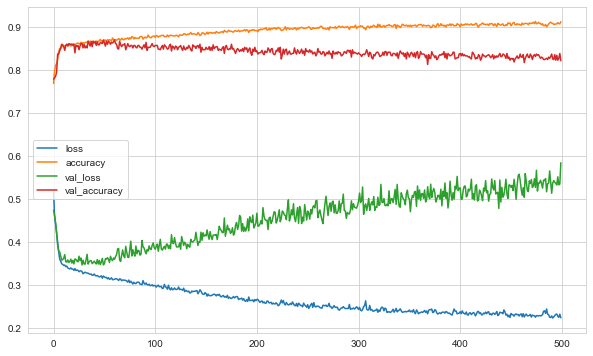

In [78]:
loss_df.plot();

### Add Dropout Layer

In [82]:
from tensorflow.keras.layers import Dropout

In [83]:
model = Sequential()

model.add(Dense(18, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.2))

model.add(Dense(12, activation = "relu"))
model.add(Dropout(0.2))

model.add(Dense(9, activation = "relu"))
model.add(Dropout(0.2))

model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.003)

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [84]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=500,
          verbose=1,
          class_weight=class_weights)

Epoch 1/500
50/50 [==============================] - 2s 11ms/step - loss: 0.6933 - accuracy: 0.4837 - val_loss: 0.6807 - val_accuracy: 0.7100
Epoch 2/500
50/50 [==============================] - 0s 4ms/step - loss: 0.6846 - accuracy: 0.5951 - val_loss: 0.6750 - val_accuracy: 0.7043
Epoch 3/500
50/50 [==============================] - 0s 4ms/step - loss: 0.6759 - accuracy: 0.5790 - val_loss: 0.6661 - val_accuracy: 0.6657
Epoch 4/500
50/50 [==============================] - 0s 5ms/step - loss: 0.6706 - accuracy: 0.6151 - val_loss: 0.6504 - val_accuracy: 0.6843
Epoch 5/500
50/50 [==============================] - 0s 4ms/step - loss: 0.6601 - accuracy: 0.6060 - val_loss: 0.6415 - val_accuracy: 0.6843
Epoch 6/500
50/50 [==============================] - 0s 5ms/step - loss: 0.6609 - accuracy: 0.6248 - val_loss: 0.6269 - val_accuracy: 0.7071
Epoch 7/500
50/50 [==============================] - 0s 5ms/step - loss: 0.6512 - accuracy: 0.6535 - val_loss: 0.6255 - val_accuracy: 0.7029
Epoch 8/500


In [85]:
loss_df = pd.DataFrame(model.history.history)
loss_df

,loss,accuracy,val_loss,val_accuracy
0,0.693,0.484,0.681,0.710
1,0.685,0.595,0.675,0.704
2,0.676,0.579,0.666,0.666
3,0.671,0.615,0.650,0.684
4,0.660,0.606,0.642,0.684
...,...,...,...,...
495,0.458,0.782,0.459,0.786
496,0.459,0.783,0.457,0.783
497,0.460,0.790,0.470,0.771
498,0.464,0.784,0.470,0.773


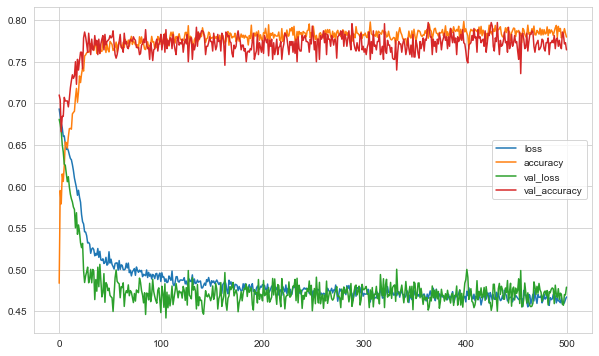

In [86]:
loss_df.plot();

In [87]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

94/94 [==============================] - 0s 2ms/step
[[1798  591]
 [ 149  462]]
              precision    recall  f1-score   support

           0       0.92      0.75      0.83      2389
           1       0.44      0.76      0.56       611

    accuracy                           0.75      3000
   macro avg       0.68      0.75      0.69      3000
weighted avg       0.82      0.75      0.77      3000



### Add Early Stop

#### Monitor the "val_loss" as metric

In [88]:
from tensorflow.keras.callbacks import EarlyStopping

In [89]:
model = Sequential()

model.add(Dense(18, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(12, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [90]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 50, restore_best_weights = True)

In [93]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=1000,
          verbose=1,
          class_weight=class_weights,
          callbacks = [early_stop])

Epoch 1/1000
50/50 [==============================] - 0s 5ms/step - loss: 0.4398 - accuracy: 0.8051 - val_loss: 0.4702 - val_accuracy: 0.7757
Epoch 2/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4365 - accuracy: 0.8059 - val_loss: 0.4648 - val_accuracy: 0.7771
Epoch 3/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4376 - accuracy: 0.8002 - val_loss: 0.4299 - val_accuracy: 0.7986
Epoch 4/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4368 - accuracy: 0.8014 - val_loss: 0.4426 - val_accuracy: 0.7943
Epoch 5/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4385 - accuracy: 0.7990 - val_loss: 0.4653 - val_accuracy: 0.7786
Epoch 6/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4372 - accuracy: 0.8035 - val_loss: 0.4720 - val_accuracy: 0.7714
Epoch 7/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.4389 - accuracy: 0.8008 - val_loss: 0.4671 - val_accuracy: 0.7800
Epoch 

In [94]:
loss_df = pd.DataFrame(model.history.history)
loss_df

,loss,accuracy,val_loss,val_accuracy
0,0.440,0.805,0.470,0.776
1,0.436,0.806,0.465,0.777
2,0.438,0.800,0.430,0.799
3,0.437,0.801,0.443,0.794
4,0.438,0.799,0.465,0.779
...,...,...,...,...
73,0.430,0.808,0.471,0.773
74,0.430,0.804,0.451,0.793
75,0.431,0.808,0.426,0.810
76,0.430,0.807,0.472,0.771


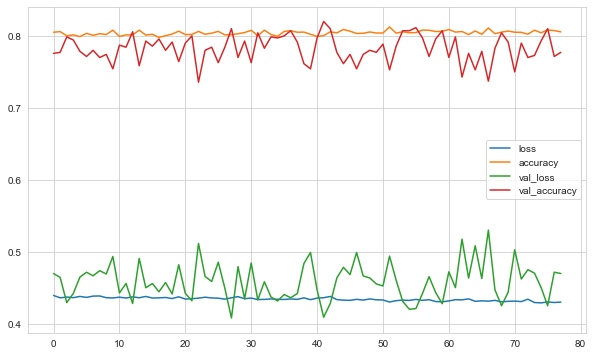

In [95]:
loss_df.plot();

In [96]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

94/94 [==============================] - 0s 1ms/step
[[2054  335]
 [ 203  408]]
              precision    recall  f1-score   support

           0       0.91      0.86      0.88      2389
           1       0.55      0.67      0.60       611

    accuracy                           0.82      3000
   macro avg       0.73      0.76      0.74      3000
weighted avg       0.84      0.82      0.83      3000



#### Monitor the "val_recall" as metric

In [97]:
model = Sequential()

model.add(Dense(18, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(12, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["Recall"])

In [98]:
early_stop = EarlyStopping(monitor = "val_recall", mode = "max", verbose = 1, patience = 50, restore_best_weights = True)

In [99]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=500,
          verbose=1,
          class_weight=class_weights,
          callbacks = [early_stop])

Epoch 1/500
50/50 [==============================] - 2s 14ms/step - loss: 0.6755 - recall: 0.5224 - val_loss: 0.6558 - val_recall: 0.6000
Epoch 2/500
50/50 [==============================] - 0s 3ms/step - loss: 0.6552 - recall: 0.5216 - val_loss: 0.6223 - val_recall: 0.6065
Epoch 3/500
50/50 [==============================] - 0s 5ms/step - loss: 0.6404 - recall: 0.5610 - val_loss: 0.6242 - val_recall: 0.6774
Epoch 4/500
50/50 [==============================] - 0s 5ms/step - loss: 0.6299 - recall: 0.5862 - val_loss: 0.6259 - val_recall: 0.6903
Epoch 5/500
50/50 [==============================] - 0s 5ms/step - loss: 0.6192 - recall: 0.6137 - val_loss: 0.5824 - val_recall: 0.6194
Epoch 6/500
50/50 [==============================] - 0s 5ms/step - loss: 0.6070 - recall: 0.6397 - val_loss: 0.5776 - val_recall: 0.6516
Epoch 7/500
50/50 [==============================] - 0s 4ms/step - loss: 0.5958 - recall: 0.6546 - val_loss: 0.5573 - val_recall: 0.6452
Epoch 8/500
50/50 [=====================

In [100]:
loss_df = pd.DataFrame(model.history.history)
loss_df

,loss,recall,val_loss,val_recall
0,0.675,0.522,0.656,0.600
1,0.655,0.522,0.622,0.606
2,0.640,0.561,0.624,0.677
3,0.630,0.586,0.626,0.690
4,0.619,0.614,0.582,0.619
...,...,...,...,...
71,0.449,0.765,0.419,0.729
72,0.446,0.781,0.499,0.813
73,0.445,0.769,0.442,0.755
74,0.440,0.774,0.450,0.755


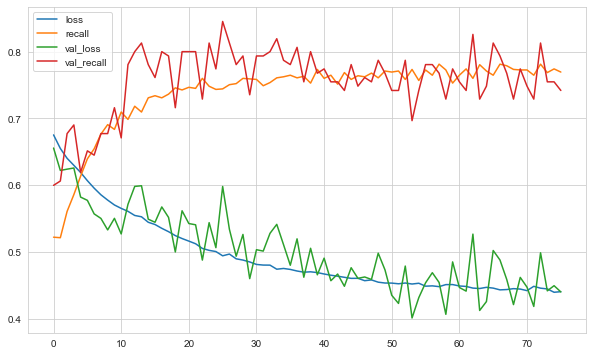

In [101]:
loss_df.plot();

In [102]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

94/94 [==============================] - 0s 2ms/step
[[1589  800]
 [ 118  493]]
              precision    recall  f1-score   support

           0       0.93      0.67      0.78      2389
           1       0.38      0.81      0.52       611

    accuracy                           0.69      3000
   macro avg       0.66      0.74      0.65      3000
weighted avg       0.82      0.69      0.72      3000



## GridSearchCV

In [ ]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam

In [ ]:
def build_classifier(optimizer, learn_rate):
    classifier = Sequential()
    classifier.add(Dense(units = 18, activation = 'relu'))
    classifier.add(Dense(units = 9, activation = 'relu'))
    classifier.add(Dense(units = 5, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer(learn_rate), loss = 'binary_crossentropy', metrics = ['Recall'])
    return classifier

In [171]:
early_stop = EarlyStopping(monitor = "val_recall", mode = "max", verbose = 1, patience = 100, restore_best_weights = True)

In [172]:
classifier_model = KerasClassifier(build_fn = build_classifier, validation_split = 0.1, epochs = 200)

parameters = {'batch_size': [32, 64],
              'optimizer': [Adam, RMSprop, Adadelta, Nadam],
              'learn_rate': [0.001, 0.002, 0.003]}

grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = 'recall',
                          cv = 5,
                          n_jobs = -1,
                          verbose = 1)

In [ ]:
grid_model.fit(X_train, y_train, class_weight=class_weights, callbacks = [early_stop])

Fitting 5 folds for each of 24 candidates, totalling 120 fits


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [ ]:
grid_model.best_score_

In [ ]:
grid_model.best_params_

In [ ]:
grid_result = pd.DataFrame(grid_model.cv_results_)[["mean_test_score", "std_test_score", "rank_test_score", "params"]].sort_values(by="rank_test_score")
grid_result

In [ ]:
y_pred = grid_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
y_pred_proba = grid_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred_proba)

# Final Model and Model Deployment

In [25]:
import pickle

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.30)

In [27]:
cat = X_train.select_dtypes("object").columns.to_list()
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse=False), cat),
    remainder=MinMaxScaler()
)

In [28]:
X_train = column_trans.fit_transform(X_train)
X_test = column_trans.transform(X_test)

In [29]:
pickle.dump(column_trans, open("column_trans", 'wb'))

In [40]:
model = Sequential()

model.add(Dense(18, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(9, activation = "relu"))
model.add(Dense(5, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = RMSprop(lr=0.003)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [41]:
early_stop = EarlyStopping(monitor = "val_recall", mode = "max", verbose = 1, patience = 25, restore_best_weights = True)

In [44]:
model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), batch_size = 32, epochs = 1000, verbose = 1,
          class_weight=class_weights, callbacks = [early_stop])

Epoch 1/1000
219/219 [==============================] - 3s 5ms/step - loss: 0.6573 - recall: 0.4965 - val_loss: 0.6433 - val_recall: 0.7103
Epoch 2/1000
219/219 [==============================] - 1s 3ms/step - loss: 0.6127 - recall: 0.6739 - val_loss: 0.5413 - val_recall: 0.5434
Epoch 3/1000
219/219 [==============================] - 1s 3ms/step - loss: 0.5791 - recall: 0.6809 - val_loss: 0.5020 - val_recall: 0.5450
Epoch 4/1000
219/219 [==============================] - 1s 3ms/step - loss: 0.5597 - recall: 0.6978 - val_loss: 0.5262 - val_recall: 0.6350
Epoch 5/1000
219/219 [==============================] - 1s 3ms/step - loss: 0.5433 - recall: 0.7209 - val_loss: 0.5686 - val_recall: 0.7316
Epoch 6/1000
219/219 [==============================] - 1s 3ms/step - loss: 0.5352 - recall: 0.7307 - val_loss: 0.6233 - val_recall: 0.8036
Epoch 7/1000
219/219 [==============================] - 1s 3ms/step - loss: 0.5241 - recall: 0.7426 - val_loss: 0.4589 - val_recall: 0.6219
Epoch 8/1000
219/219

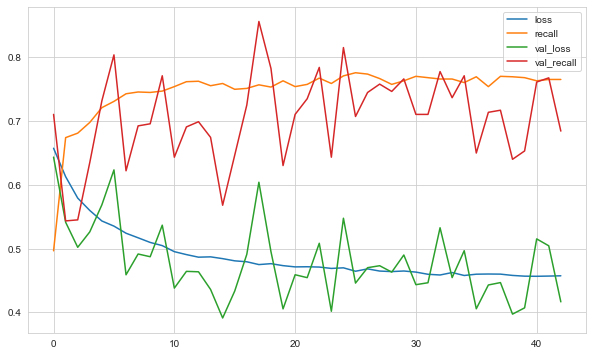

In [45]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()
plt.show()

In [46]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

94/94 [==============================] - 0s 2ms/step
[[1490  899]
 [  88  523]]
              precision    recall  f1-score   support

           0       0.94      0.62      0.75      2389
           1       0.37      0.86      0.51       611

    accuracy                           0.67      3000
   macro avg       0.66      0.74      0.63      3000
weighted avg       0.83      0.67      0.70      3000



In [47]:
model.save('model_customer_churn.h5')

## Prediction

In [53]:
from tensorflow.keras.models import load_model
model_churn = load_model('model_customer_churn.h5')
transformer_churn= pickle.load(open("column_trans", "rb"))

In [54]:
single_customer = df.drop('Exited', axis = 1).iloc[20:21, :]
single_customer

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
20,732,France,Male,41,8,0.000,2,1,1,170886.170


In [55]:
single_customer = transformer_churn.transform(single_customer)
single_customer

array([[1.        , 0.        , 0.        , 0.        , 1.        ,
        0.764     , 0.31081081, 0.8       , 0.        , 0.33333333,
        1.        , 1.        , 0.85454745]])

In [56]:
(model_churn.predict(single_customer) > 0.5).astype("int32")

1/1 [==============================] - 0s 125ms/step


array([[0]])

In [57]:
df["Exited"].iloc[24]

0

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___